In [1]:
import pandas as pd

# Intentar cargar el archivo con una codificación diferente
df = pd.read_csv("./movies.csv", encoding="ISO-8859-1")

# Verificar que se haya cargado correctamente
df.head()


,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,1993-10-15,6.5,223,3,3,2,15,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18,48


## Pregunta 9
¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos de las películas?

castWomenAmount    float64
castMenAmount      float64
popularity         float64
revenue            float64
dtype: object


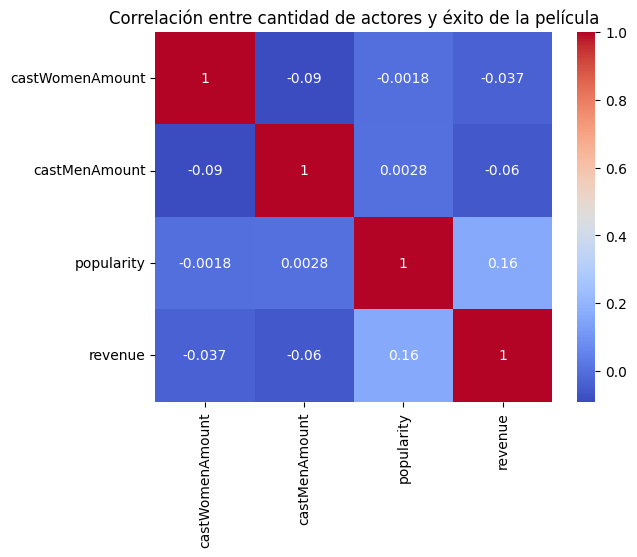

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

df[['castWomenAmount', 'castMenAmount', 'popularity', 'revenue']] = df[['castWomenAmount', 'castMenAmount', 'popularity', 'revenue']].apply(pd.to_numeric, errors='coerce')
print(df[['castWomenAmount', 'castMenAmount', 'popularity', 'revenue']].dtypes)

# Correlación entre cantidad de actores y popularidad/ingresos
correlations = df[['castWomenAmount', 'castMenAmount', 'popularity', 'revenue']].corr()

# Mostrar la matriz de correlación
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title("Correlación entre cantidad de actores y éxito de la película")
plt.show()




# Pregunta 10
¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

In [3]:
import ace_tools as tools
top_directors = df[['director', 'title', 'voteAvg']].sort_values(by='voteAvg', ascending=False).head(20)
tools.display_dataframe_to_user(name="Top 20 Directores Mejor Calificados", dataframe=top_directors)


ModuleNotFoundError: No module named 'ace_tools'

# Pregunta 11
¿Cómo se correlacionan los presupuestos con los ingresos?

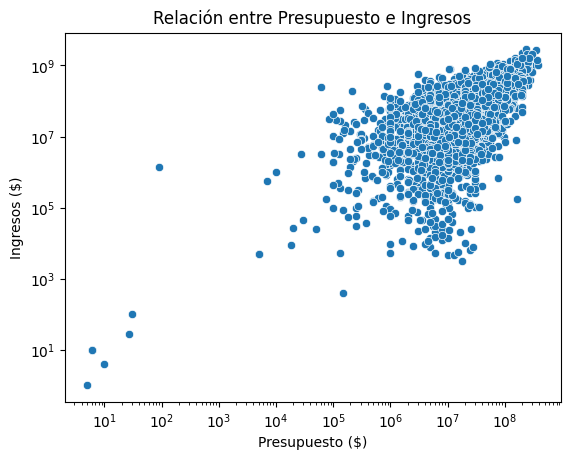

Matriz de correlación entre presupuesto e ingresos:
           budget   revenue
budget   1.000000  0.757454
revenue  0.757454  1.000000


In [4]:
sns.scatterplot(x=df['budget'], y=df['revenue'])
plt.xlabel("Presupuesto ($)")
plt.ylabel("Ingresos ($)")
plt.title("Relación entre Presupuesto e Ingresos")
plt.xscale("log")
plt.yscale("log")
plt.show()

correlation = df[['budget', 'revenue']].corr()
print("Matriz de correlación entre presupuesto e ingresos:")
print(correlation)


# Pregunta 12 
 ¿Se asocian ciertos meses de lanzamiento con mejores ingresos?

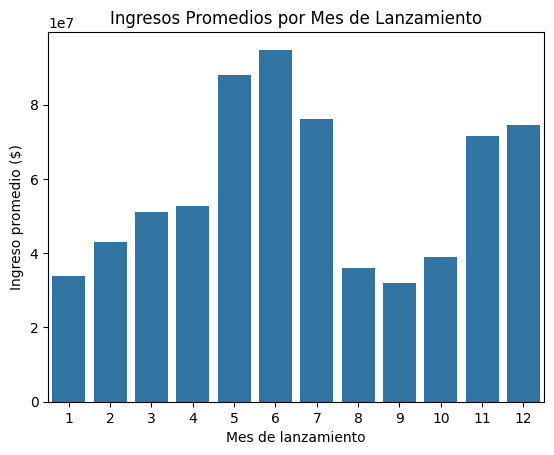

In [6]:
df['releaseDate'] = pd.to_datetime(df['releaseDate'])
df['releaseMonth'] = df['releaseDate'].dt.month

monthly_revenue = df.groupby('releaseMonth')['revenue'].mean().sort_values(ascending=False)
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.xlabel("Mes de lanzamiento")
plt.ylabel("Ingreso promedio ($)")
plt.title("Ingresos Promedios por Mes de Lanzamiento")
plt.show()


# Pregunta 13
¿En qué meses se han visto los lanzamientos con mejores ingresos? ¿Cuántas películas, en promedio, se han lanzado por mes?

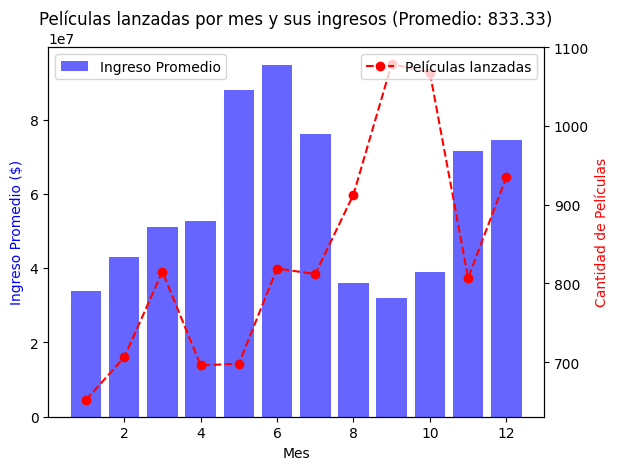

In [7]:
monthly_count = df['releaseMonth'].value_counts().sort_index()
avg_movies_per_month = monthly_count.mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(monthly_revenue.index, monthly_revenue.values, color='b', alpha=0.6, label="Ingreso Promedio")
ax2.plot(monthly_count.index, monthly_count.values, color='r', marker='o', linestyle='dashed', label="Películas lanzadas")

ax1.set_xlabel("Mes")
ax1.set_ylabel("Ingreso Promedio ($)", color='b')
ax2.set_ylabel("Cantidad de Películas", color='r')

plt.title(f"Películas lanzadas por mes y sus ingresos (Promedio: {avg_movies_per_month:.2f})")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()


# Pregunta 14
¿Cómo se correlacionan las calificaciones con el éxito comercial?

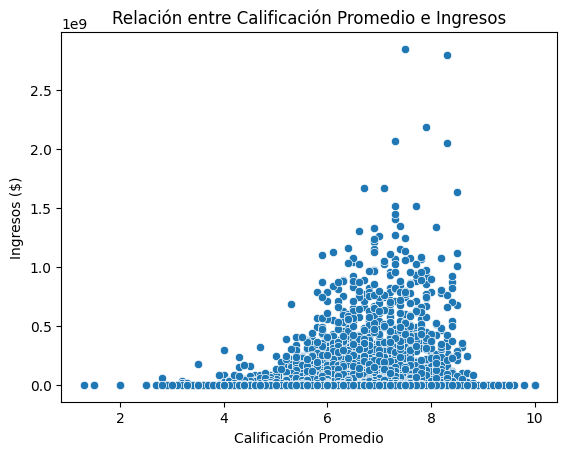

Matriz de correlación entre calificación e ingresos:
          voteAvg   revenue
voteAvg  1.000000  0.141262
revenue  0.141262  1.000000


In [8]:
sns.scatterplot(x=df['voteAvg'], y=df['revenue'])
plt.xlabel("Calificación Promedio")
plt.ylabel("Ingresos ($)")
plt.title("Relación entre Calificación Promedio e Ingresos")
plt.show()

correlation = df[['voteAvg', 'revenue']].corr()
print("Matriz de correlación entre calificación e ingresos:")
print(correlation)


# Pregunta 15 
¿La popularidad del elenco está directamente correlacionada con el éxito de taquilla?

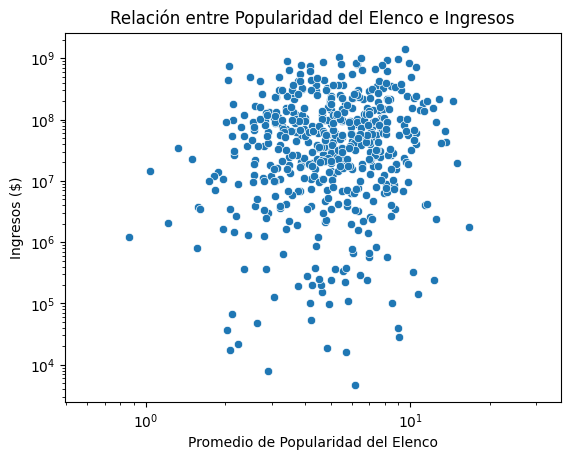

Matriz de correlación entre popularidad del elenco e ingresos:
                     actorsPopularityAvg   revenue
actorsPopularityAvg             1.000000  0.082245
revenue                         0.082245  1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reemplazar valores vacíos y no numéricos con NaN
df['actorsPopularity'] = df['actorsPopularity'].apply(
    lambda x: x if isinstance(x, str) and all(c.isdigit() or c in '.|' for c in x) else None
)

# Eliminar filas con valores incorrectos
df = df.dropna(subset=['actorsPopularity'])

# Reemplazar valores vacíos en la lista con '0'
df['actorsPopularity'] = df['actorsPopularity'].apply(lambda x: '|'.join(['0' if v == '' else v for v in x.split('|')]))

# Convertir a una lista de floats y calcular el promedio
df['actorsPopularityAvg'] = df['actorsPopularity'].str.split('|').apply(
    lambda x: sum(map(float, x)) / len(x) if isinstance(x, list) and len(x) > 0 else 0
)

# Tomar una muestra aleatoria de 1000 filas para mejorar el rendimiento
df_sample = df.sample(n=1000, random_state=42) if len(df) > 1000 else df

# Graficar
sns.scatterplot(x=df_sample['actorsPopularityAvg'], y=df_sample['revenue'])
plt.xlabel("Promedio de Popularidad del Elenco")
plt.ylabel("Ingresos ($)")
plt.title("Relación entre Popularidad del Elenco e Ingresos")
plt.xscale("log")  # Si los valores son muy dispersos
plt.yscale("log")
plt.show()

# Calcular la correlación
correlation = df[['actorsPopularityAvg', 'revenue']].corr()
print("Matriz de correlación entre popularidad del elenco e ingresos:")
print(correlation)


# Pregunta 16
¿Qué estrategias de marketing, como videos promocionales o páginas oficiales, generan mejores resultados?

[False nan True]


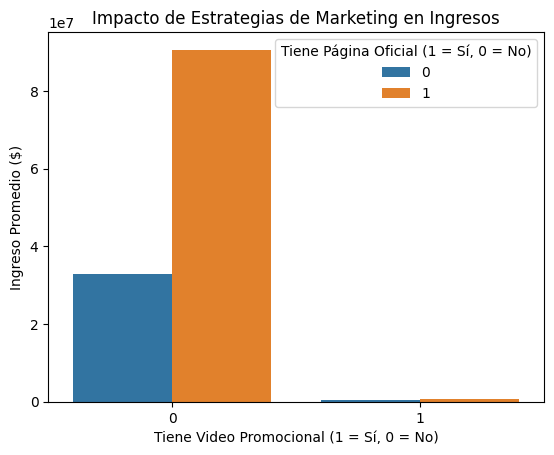

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


print(df['video'].unique())


df['hasVideo'] = df['video'].fillna(0).astype(int)

df['hasHomePage'] = df['homePage'].notna().astype(int)

marketing_effects = df.groupby(['hasVideo', 'hasHomePage'])['revenue'].mean().reset_index()

sns.barplot(x=marketing_effects['hasVideo'], y=marketing_effects['revenue'], hue=marketing_effects['hasHomePage'])
plt.xlabel("Tiene Video Promocional (1 = Sí, 0 = No)")
plt.ylabel("Ingreso Promedio ($)")
plt.title("Impacto de Estrategias de Marketing en Ingresos")
plt.legend(title="Tiene Página Oficial (1 = Sí, 0 = No)")
plt.show()
